**original Source : https://github.com/pytorch/examples/mnist/main.py**

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.1537, 0.7168, 0.1840],
        [0.6816, 0.4032, 0.3696],
        [0.8658, 0.7356, 0.6166],
        [0.4495, 0.8157, 0.5622],
        [0.1455, 0.4874, 0.1608]])


In [0]:
torch.cuda.is_available()

True

In [0]:
import torch
import torch.nn.init
from torch.autograd import Variable

In [0]:
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms
torch.manual_seed(8)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

## Loading MNIST dataset

In [0]:
# MNIST dataset
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Processing...
Done!


torch.Size([60000, 28, 28])
torch.Size([60000])


Text(0.5,1,'5')

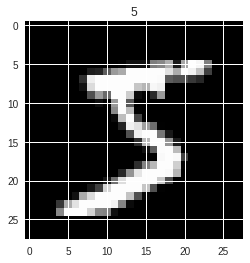

In [0]:
print(mnist_train.train_data.size())
print(mnist_train.train_labels.size())

idx=0
plt.imshow(mnist_train.train_data[idx,:,:].numpy(), cmap='gray')
plt.title('%i' % mnist_train.train_labels[idx])

## Data Loader

In [0]:
batch_size = 100

data_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

torch.Size([100, 1, 28, 28])
torch.Size([100])


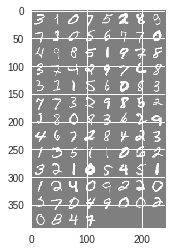

array([3, 1, 0, 7, 5, 2, 8, 9, 7, 3, 0, 5, 6, 7, 7, 0, 4, 9, 8, 5, 1, 9,
       7, 8, 3, 7, 4, 2, 9, 7, 6, 8, 3, 1, 1, 5, 6, 0, 8, 3, 7, 7, 3, 2,
       9, 8, 5, 2, 2, 8, 0, 8, 3, 6, 2, 9, 4, 6, 7, 2, 8, 4, 2, 3, 1, 3,
       5, 1, 1, 0, 6, 2, 3, 2, 1, 0, 5, 4, 5, 1, 1, 2, 4, 0, 9, 2, 2, 0,
       3, 7, 0, 4, 9, 0, 0, 2, 0, 8, 4, 7])

In [0]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
batch_images, batch_labels = next(iter(data_loader))

print(batch_images.size())
print(batch_labels.size())

#숫자 100개 표시
imshow(utils.make_grid(batch_images))
batch_labels.numpy()

## Define Neural Network

In [0]:
linear1 = torch.nn.Linear(784, 512, bias = True)
linear2 = torch.nn.Linear(512, 10, bias = True)
relu = torch.nn.ReLU()

model = torch.nn.Sequential(linear1, relu, linear2)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=10, bias=True)
)


In [0]:
cost_func = torch.nn.CrossEntropyLoss()
# Softmax 내장

## Mdel Training

In [0]:
learning_rate = 0.001
training_epochs = 5

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        X = Variable(batch_images.view(-1, 28 * 28))
        Y = Variable(batch_labels)
        
        optimizer.zero_grad()
        Y_prediction = model(X)
        cost = cost_func(Y_prediction, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost.data[0]))
    
print("Learning Ginished!")

[Epoch:    1] cost = 0.291500777


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[Epoch:    2] cost = 0.114722379
[Epoch:    3] cost = 0.0744908303
[Epoch:    4] cost = 0.0548742115
[Epoch:    5] cost = 0.0391889401
Learning Ginished!


In [0]:
#model.load_state_dict(torch.load('NN.pkl'))
#model.state_dict()

## Measure performance

In [0]:
correct = 0
total = 0
for images, labels in mnist_test:
    images  = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 98 %


## Random test

In [0]:
r = random.randint(0, len(mnist_test)-1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1,28*28).float())
Y_single_data = Variable(mnist_test.test_labels[r:r + 1])

Label :  [8]
Prediction :  [8]


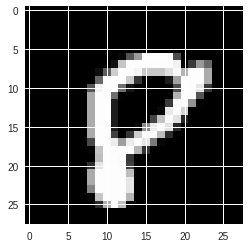

In [0]:
single_prediction = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_prediction.data, 1)[1].numpy())

0


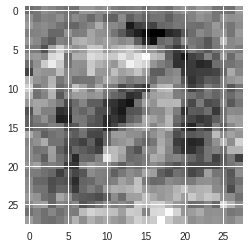

1


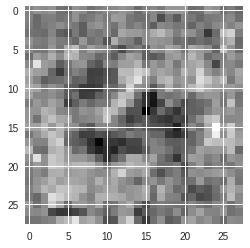

2


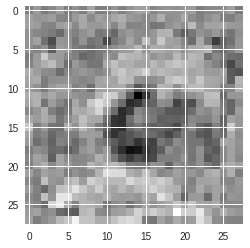

3


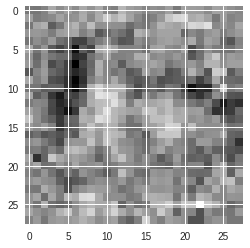

4


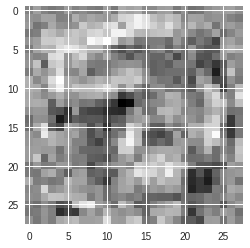

5


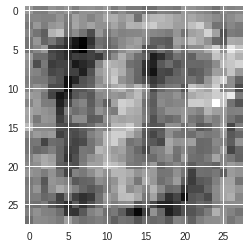

6


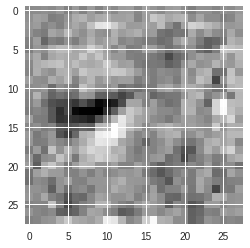

7


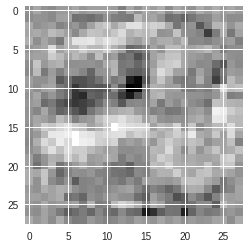

8


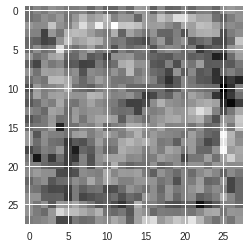

9


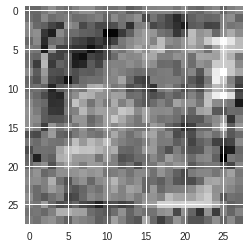

10


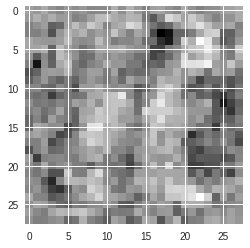

11


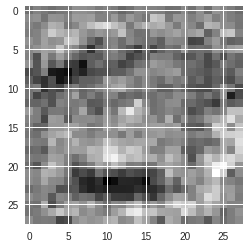

12


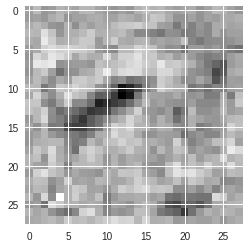

13


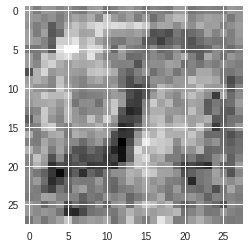

14


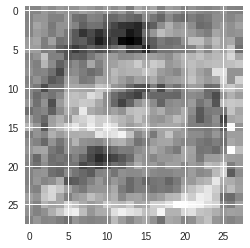

15


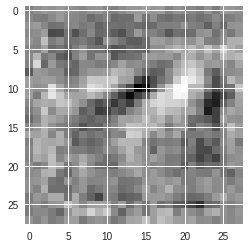

16


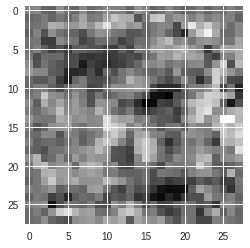

17


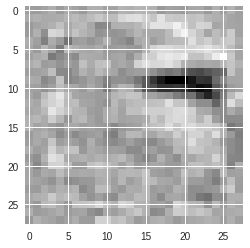

18


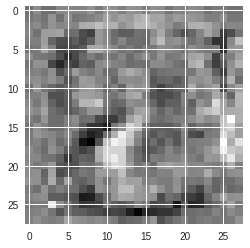

19


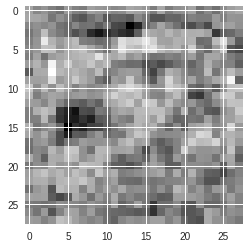

In [0]:
for i in range(20):
    weight = model[0].weight[i, :].data.view(28,28)
    weight = (weight - torch.min(weight))/(torch.max(weight)-torch.min(weight))
    print(i)
    plt.imshow(weight.numpy(), cmap='gray')
    plt.show()